# Naver Movie Review EDA

In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

In [2]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
base_path = '/content/gdrive/My Drive/Colab Notebooks'

In [3]:
data_in_path = base_path + '/data_in/'
data_out_path = base_path + '/data_out/'

In [4]:
if not os.path.exists(data_in_path):
    os.makedirs(data_in_path)
    
if not os.path.exists(data_out_path):
    os.makedirs(data_out_path)

### Data DownLoad 하기 https://github.com/e9t/nsmc

In [5]:
!wget -P {data_in_path} https://github.com/e9t/nsmc/raw/master/ratings_train.txt
!wget -P {data_in_path} https://github.com/e9t/nsmc/raw/master/ratings_test.txt

--2020-01-26 15:13:13--  https://github.com/e9t/nsmc/raw/master/ratings_train.txt
Resolving github.com (github.com)... 15.164.81.167
Connecting to github.com (github.com)|15.164.81.167|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt [following]
--2020-01-26 15:13:13--  https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.228.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.228.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14628807 (14M) [text/plain]
Saving to: ‘./data_in/ratings_train.txt’

ratings_train.txt   100%[===================>]  13.95M  4.97MB/s    in 2.8s    

2020-01-26 15:13:18 (4.97 MB/s) - ‘./data_in/ratings_train.txt’ saved [14628807/14628807]

--2020-01-26 15:13:18--  https://github.com/e9t/nsmc/raw/master/ratings_test.txt

In [6]:
print("파일 크기 : ")
for file in os.listdir(data_in_path):
    if 'txt' in file :
        print(file.ljust(30) + str(round(os.path.getsize(data_in_path + file) / 1000000, 2)) + 'MB')

파일 크기 : 
ratings_test.txt              4.89MB
ratings_train.txt             14.63MB


In [7]:
train_data = pd.read_csv(data_in_path + 'ratings_train.txt', header = 0, delimiter = '\t')
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [8]:
print(f'전체 학습데이터의 개수: {len(train_data)}')

전체 학습데이터의 개수: 150000


In [9]:
train_lenght = train_data['document'].astype(str).apply(len)

In [10]:
train_lenght.head()

0    19
1    33
2    17
3    29
4    61
Name: document, dtype: int64

Text(0, 0.5, 'Number of review')

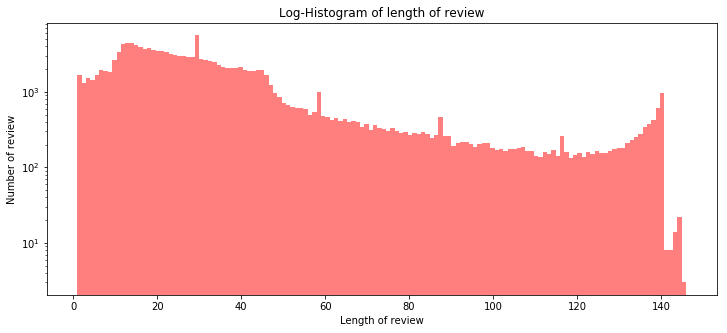

In [11]:
# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))
# 히스토그램 선언
# bins: 히스토그램 값들에 대한 버켓 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(train_lenght, bins=140, alpha=0.5, color= 'r', label='word')
plt.yscale('log', nonposy='clip')
# 그래프 제목
plt.title('Log-Histogram of length of review')
# 그래프 x 축 라벨
plt.xlabel('Length of review')
# 그래프 y 축 라벨
plt.ylabel('Number of review')

In [12]:
print(f'리뷰 길이 최대 값: {np.max(train_lenght)}'.format())
print(f'리뷰 길이 최소 값: {np.min(train_lenght)}')
print(f'리뷰 길이 평균 값: {np.mean(train_lenght):.2f}')
print(f'리뷰 길이 표준편차: {np.std(train_lenght):.2f}')
print(f'리뷰 길이 중간 값: {np.median(train_lenght)}')
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print(f'리뷰 길이 제 1 사분위: {np.percentile(train_lenght, 25)}')
print(f'리뷰 길이 제 3 사분위: {np.percentile(train_lenght, 75)}')

리뷰 길이 최대 값: 146
리뷰 길이 최소 값: 1
리뷰 길이 평균 값: 35.20
리뷰 길이 표준편차: 29.53
리뷰 길이 중간 값: 27.0
리뷰 길이 제 1 사분위: 16.0
리뷰 길이 제 3 사분위: 42.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7fa540a21438>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa540a21ac8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa540a212e8>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa540a14198>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa540a147f0>],
 'means': [<matplotlib.lines.Line2D at 0x7fa540a144e0>]}

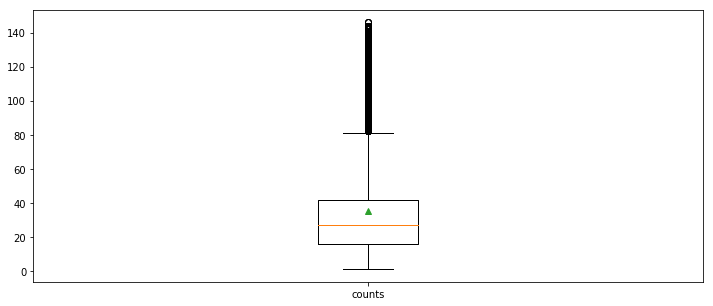

In [13]:
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot(train_lenght,
             labels=['counts'],
             showmeans=True)

In [14]:
train_review = [review for review in train_data['document'] if type(review) is str]

In [15]:
font_path = '/content/gdrive/My Drive/asset/font/NanumGothic.ttf'

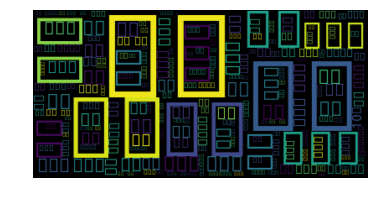

In [16]:
wordcloud = WordCloud(font_path=font_path).generate(' '.join(train_review))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

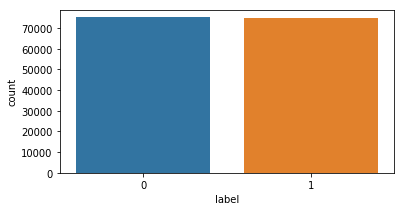

In [17]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train_data['label'])

In [18]:
print(f"긍정 리뷰 개수: {train_data['label'].value_counts()[1]}")
print(f"부정 리뷰 개수: {train_data['label'].value_counts()[0]}")

긍정 리뷰 개수: 74827
부정 리뷰 개수: 75173


In [19]:
train_word_counts = train_data['document'].astype(str).apply(lambda x:len(x.split(' ')))

Text(0, 0.5, 'Number of reviews')

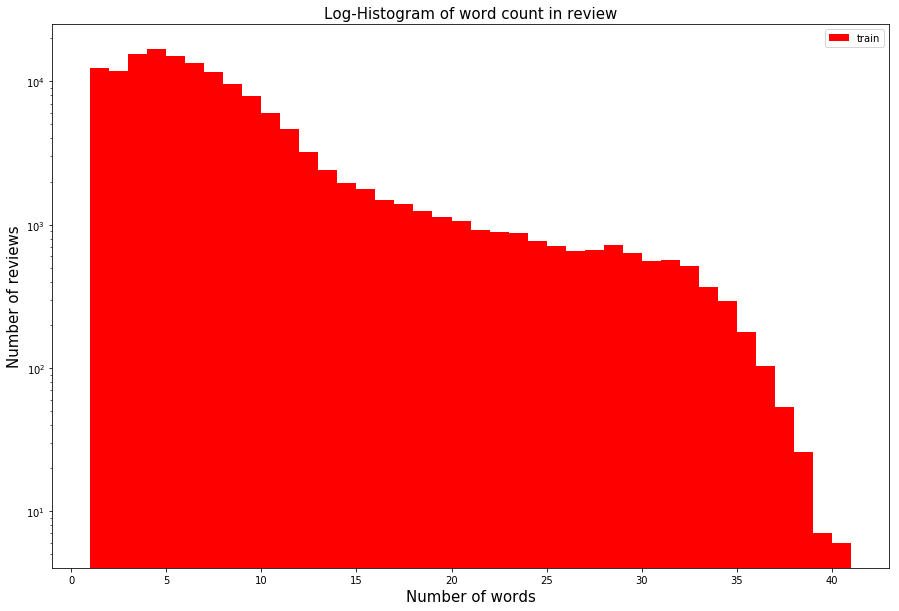

In [20]:
plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=40, facecolor='r',label='train')
plt.title('Log-Histogram of word count in review', fontsize=15)
plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of reviews', fontsize=15)

In [21]:
print(f'리뷰 단어 개수 최대 값: {np.max(train_word_counts)}'.format())
print(f'리뷰 단어 개수 최소 값: {np.min(train_word_counts)}')
print(f'리뷰 단어 개수 평균 값: {np.mean(train_word_counts):.2f}')
print(f'리뷰 단어 개수 표준편차: {np.std(train_word_counts):.2f}')
print(f'리뷰 단어 개수 중간 값: {np.median(train_word_counts)}')
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print(f'리뷰 단어 개수 제 1 사분위: {np.percentile(train_word_counts, 25)}')
print(f'리뷰 단어 개수 제 3 사분위: {np.percentile(train_word_counts, 75)}')

리뷰 단어 개수 최대 값: 41
리뷰 단어 개수 최소 값: 1
리뷰 단어 개수 평균 값: 7.58
리뷰 단어 개수 표준편차: 6.51
리뷰 단어 개수 중간 값: 6.0
리뷰 단어 개수 제 1 사분위: 3.0
리뷰 단어 개수 제 3 사분위: 9.0


In [22]:
qmarks = np.mean(train_data['document'].astype(str).apply(lambda x: '?' in x)) # 물음표가 구두점으로 쓰임
fullstop = np.mean(train_data['document'].astype(str).apply(lambda x: '.' in x)) # 마침표
                  
print('물음표가있는 질문: {:.2f}%'.format(qmarks * 100))
print('마침표가 있는 질문: {:.2f}%'.format(fullstop * 100))

물음표가있는 질문: 8.25%
마침표가 있는 질문: 51.76%


# Naver Movie Review PreProcessing

### okt 인스톨 해야 한다.

In [18]:
!pip install konlpy

In [23]:
import numpy as np
import pandas as pd
import re
import json
from konlpy.tag import Okt
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer

In [24]:
train_data = pd.read_csv(data_in_path + 'ratings_train.txt', header=0, delimiter='\t')

print(train_data.head())

         id                                           document  label
0   9976970                                아 더빙.. 진짜 짜증나네요 목소리      0
1   3819312                  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1
2  10265843                                  너무재밓었다그래서보는것을추천한다      0
3   9045019                      교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정      0
4   6483659  사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...      1


In [25]:
review_text = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]", "", train_data['document'][4]) 
print(review_text)

사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다


In [26]:
okt=Okt()
review_text = okt.morphs(review_text, stem=True)
print(review_text)

/Users/chojunghyun/anaconda3/envs/tensorflow/lib/python3.6/site-packages/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


['사이', '몬페', '그', '의', '익살스럽다', '연기', '가', '돋보이다', '영화', '스파이더맨', '에서', '늙다', '보이다', '하다', '커스틴', '던스트', '가', '너무나도', '이쁘다', '보이다']


In [27]:
stop_words = set(['은', '는', '이', '가', '하', '아', '것', '들','의', '있', '되', '수', '보', '주', '등', '한'])
clean_review = [token for token in review_text if not token in stop_words]
print(clean_review)

['사이', '몬페', '그', '익살스럽다', '연기', '돋보이다', '영화', '스파이더맨', '에서', '늙다', '보이다', '하다', '커스틴', '던스트', '너무나도', '이쁘다', '보이다']


In [28]:
def preprocessing(review, okt, remove_stopwords = False, stop_words = []):
    # 함수의 인자는 다음과 같다.
    # review : 전처리할 텍스트
    # okt : okt 객체를 반복적으로 생성하지 않고 미리 생성후 인자로 받는다.
    # remove_stopword : 불용어를 제거할지 선택 기본값은 False
    # stop_word : 불용어 사전은 사용자가 직접 입력해야함 기본값은 비어있는 리스트
    
    # 1. 한글 및 공백을 제외한 문자 모두 제거.
    review_text = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]", "", review)
    
    # 2. okt 객체를 활용해서 형태소 단위로 나눈다.
    word_review = okt.morphs(review_text, stem=True)
    
    if remove_stopwords:
        
        # 불용어 제거(선택적)
        word_review = [token for token in word_review if not token in stop_words]
        
    return word_review

In [29]:
from tqdm import tqdm_notebook

clean_train_review = []

for review in tqdm_notebook(train_data['document']):
    # 비어있는 데이터에서 멈추지 않도록 string인 경우만 진행
    if type(review) == str:
        clean_train_review.append(preprocessing(review, okt, remove_stopwords = True, stop_words=stop_words))
    else:
        clean_train_review.append([])  #string이 아니면 비어있는 값 추가

In [30]:
test_data = pd.read_csv(data_in_path + 'ratings_test.txt', header=0, delimiter='\t', quoting=3 )

clean_test_review = []

for review in tqdm_notebook(test_data['document']):
    # 비어있는 데이터에서 멈추지 않도록 string인 경우만 진행
    if type(review) == str:
        clean_test_review.append(preprocessing(review, okt, remove_stopwords = True, stop_words=stop_words))
    else:
        clean_test_review.append([])  #string이 아니면 비어있는 값 추가

In [31]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_review)
train_sequences = tokenizer.texts_to_sequences(clean_train_review)
test_sequences = tokenizer.texts_to_sequences(clean_test_review)

word_vocab = tokenizer.word_index # 단어 사전 형태
special_tokens = {'<PAD>': 0}
for token, idx in special_tokens.items():
    word_vocab[token] = idx

In [32]:
max_lenght = 50

train_inputs = pad_sequences(train_sequences, maxlen=max_lenght, padding='post') # 학습 데이터를 벡터화
train_labels = np.array(train_data['label']) # 학습 데이터의 라벨

test_inputs = pad_sequences(test_sequences, maxlen=max_lenght, padding='post') # 테스트 데이터를 벡터화
test_labels = np.array(test_data['label']) # 테스트 데이터의 라벨

In [33]:
train_input_data = 'nsmc_train_input.npy'
train_label_data = 'nsmc_train_label.npy'
test_input_data = 'nsmc_test_input.npy'
test_label_data = 'nsmc_test_label.npy'
data_configs = 'data_configs.json'

configs = {}

configs['vocab'] = word_vocab
configs['vocab_size'] = len(word_vocab) # vocab size 추가

import os
# 저장하는 디렉토리가 존재하지 않으면 생성
if not os.path.exists(data_in_path):
    os.makedirs(data_in_path)

# 전처리 된 학습 데이터를 넘파이 형태로 저장
np.save(open(data_in_path + train_input_data, 'wb'), train_inputs)
np.save(open(data_in_path + train_label_data, 'wb'), train_labels)
# 전처리 된 테스트 데이터를 넘파이 형태로 저장
np.save(open(data_in_path + test_input_data, 'wb'), test_inputs)
np.save(open(data_in_path + test_label_data, 'wb'), test_labels)

# 데이터 사전을 json 형태로 저장
json.dump(configs, open(data_in_path + data_configs, 'w'), ensure_ascii=False)

In [34]:
import pickle

In [35]:
clean_train_data = 'clean_train_data.pkl'
clean_test_data = 'clean_test_data.pkl'

pickle.dump(clean_train_review, open(data_in_path + clean_train_data, 'wb'))
pickle.dump(clean_test_review, open(data_in_path + clean_test_data, 'wb'))